<a href="https://colab.research.google.com/github/BasheerAhmedk/Machine-Learning-Projects/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras. layers import Dropout

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/Churn_Modelling.csv")
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)
X=pd.concat([X,geography,gender],axis=1)
X.drop(['Geography','Gender'],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
classifier= Sequential()

In [ ]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 dense_3 (Dense)             (None, 6)                 12        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 182
Trainable params: 182
Non-trainable 

In [ ]:
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 3s 2ms/step - loss: 0.6455 - accuracy: 0.7063 - val_loss: 0.5437 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4797 - accuracy: 0.7962 - val_loss: 0.4592 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.7962 - val_loss: 0.4365 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4203 - accuracy: 0.7962 - val_loss: 0.4215 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4074 - accuracy: 0.7962 - val_loss: 0.4129 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.7962 - val_loss: 0.4061 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3895 - accuracy: 0.7962 - val_loss: 0.4033 - val_accuracy: 0.7955

In [ ]:
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)
y_pred

63/63 [==============================] - 1s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)

[[1504   91]
 [ 182  223]]
The accuracy of the model is 0.8635
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.55      0.62       405

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.86      0.86      0.86      2000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


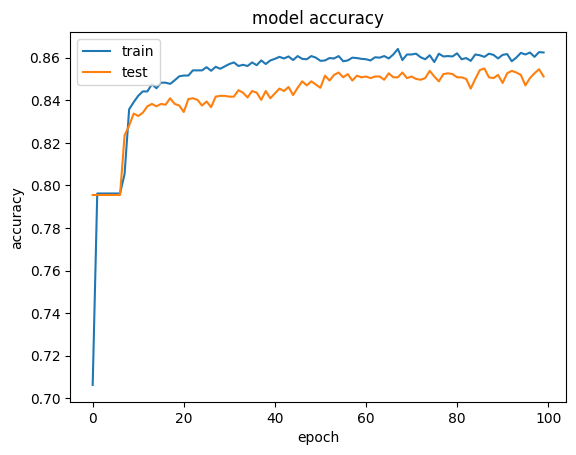

In [ ]:
import matplotlib.pyplot as plt
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()